In [1]:
import pandas as pd
import numpy as np

In [49]:
def plot_price(ballots, weights, color, t=1):
    ax = (
        ballots[color]
        .clip(0, weights.clip(0, t))
        .plot(kind="bar", stacked=False, rot=0, width=1, color=color, alpha=0.8)
    )

    ax = (
        ballots[color]
        .clip(0, weights)
        .plot(kind="bar", stacked=False, rot=0, width=1, color=color, alpha=0.3)
    )

    if t != 1:
        ax.axhline(y=t, linestyle="--")
    return ax

In [82]:
ballots = [
    {"Red": 1, "Green": 0, "Orange": 0, "Blue": 1, "Purple": 0},
    {"Red": 1, "Green": 1, "Orange": 1, "Blue": 0, "Purple": 0},
    {"Red": 1, "Green": 0, "Orange": 1, "Blue": 0, "Purple": 1},
    {"Red": 0, "Green": 1, "Orange": 0, "Blue": 1, "Purple": 1},
    {"Red": 1, "Green": 1, "Orange": 1, "Blue": 0, "Purple": 1},
    {"Red": 0, "Green": 1, "Orange": 0, "Blue": 1, "Purple": 0},
    {"Red": 0, "Green": 0, "Orange": 0, "Blue": 1, "Purple": 0},
    {"Red": 1, "Green": 0, "Orange": 1, "Blue": 0, "Purple": 1},
    {"Red": 1, "Green": 0, "Orange": 1, "Blue": 0, "Purple": 1},
]
ballots = pd.DataFrame(ballots)

# First Round
For illustration purposes, consider the Blue candidate. We plot the electorate with voters on the x-axis and approval on the y-axis. Blue is approved by voters {0, 3, 4, 5}.


We have 9 voters total, so if we are to elect 3 seats then a quota is exactly 3 voters.

<AxesSubplot:>

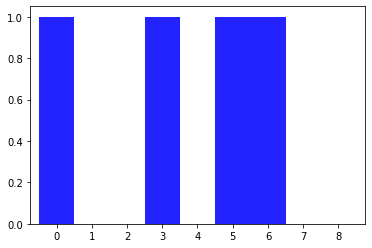

In [68]:
weights = pd.Series(np.ones(9))
plot_price(ballots, weights, "Blue")

We usually think of assigning voters to candidates such that once a voter gets a representative they have no further influence on the election. This prevents small groups of voters from getting an unjust majority! However, Blue gets 4 approvals which is *more* than needed for a quota, so assigning 100% of all those ballots would be taking too much ballot weight away from the election. To be more proportional, we could take only 75% of each Blue ballot such that exactly one quota is taken (shown below the dashed line).

<AxesSubplot:>

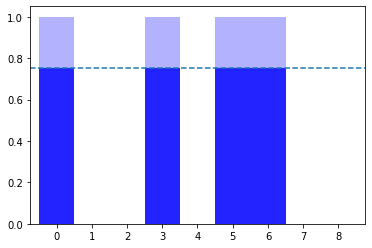

In [69]:
plot_price(ballots, weights, "Blue", t=0.75)

However, if we do the same analysis for Red, it turns out we only need to take 50% of each ballot approving Red in order to attain one quota.

<AxesSubplot:>

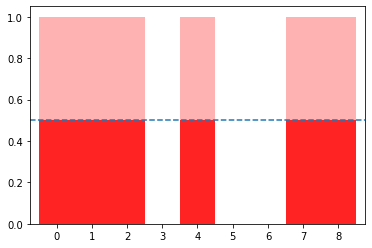

In [70]:
plot_price(ballots, weights, "Red", t=0.5)

It might be intuitive that to satisfy the most people, we should elect candidates that require we take as little ballot weight as possible from each voter. It turns out, if we select winners according to exactly this principle, the outcome is extremely proportional! So, let's elect Red and subtract 50% of the ballot weight from each of Red's voters.

In [71]:
weights[[0, 1, 2, 6, 7]] = (weights[[0, 1, 2, 6, 7]] - 0.5).clip(0, 1)

# Second Round

We proceed exactly as the first, but we keep in mind that some voters have lower ballot weights. Let's see how the remaining candidates stack up.

<AxesSubplot:>

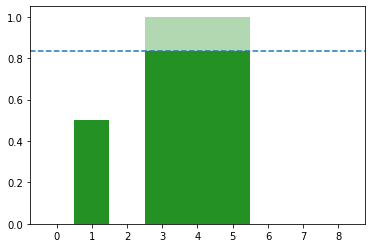

In [84]:
plot_price(ballots, weights, "Green", t=5 / 6)

<AxesSubplot:>

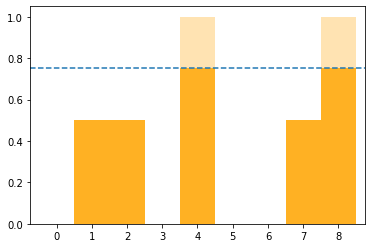

In [77]:
plot_price(ballots, weights, "Orange", t=0.75)

<AxesSubplot:>

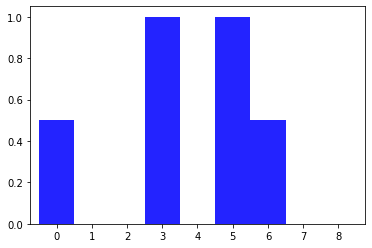

In [79]:
plot_price(ballots, weights, "Blue", t=1)

<AxesSubplot:>

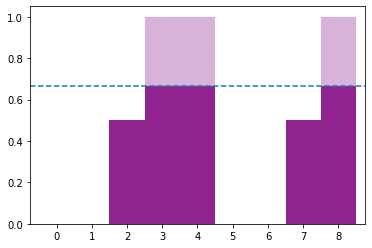

In [81]:
plot_price(ballots, weights, "Purple", t=2 / 3)

Since Blue requires taking 100% of the ballot weight of Blue supporters, Green takes 83%, Orange takes 75%, and Purple takes 67%, we elect Purple in the second round! Do not forget to update the ballot weights.

In [85]:
weights[[2, 3, 4, 7, 8]] = (weights[[2, 3, 4, 7, 8]] - 2 / 3).clip(0, 1)

# Third Round
Continue the process one final time to elect the last seat

<AxesSubplot:>

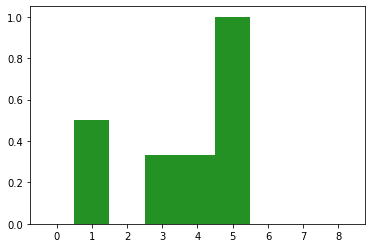

In [90]:
plot_price(ballots, weights, "Green")

<AxesSubplot:>

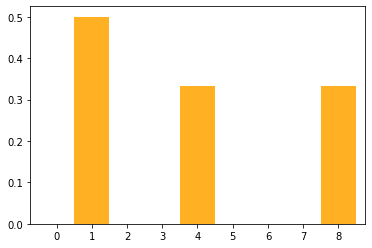

In [91]:
plot_price(ballots, weights, "Orange", t=1)

<AxesSubplot:>

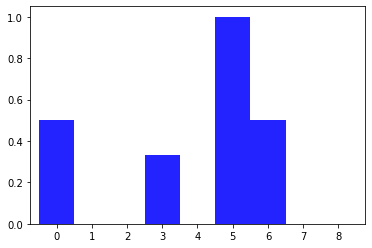

In [92]:
plot_price(ballots, weights, "Blue", t=1)

Something interesting has happened... where did the surplus go? Well, after removing the ballot weights from electing Red and Purple, it just so happens that no candidate receives a surplus! In these situations, we just select a winner based on the remaining support for that candidate. Those values are

In [93]:
ballots[["Green", "Orange", "Blue"]].mul(weights, axis=0).sum()

Green     2.166667
Orange    1.166667
Blue      2.333333
dtype: float64

So Blue is elected for the third and final seat! Thus our winners under the Method of Equal Shares are {Red, Purple, Blue}.